# Auswertung

In [1]:
import scipy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import os
import numpy as np

pd.set_option('display.float_format', '{:.2f}'.format)

%matplotlib inline

In [2]:
def poly_quadratic(x: np.ndarray, a: float, b: float) -> np.ndarray:
    return a * x ** 2 + b * x

def get_error_bounds(curvature_array):
    error = poly_quadratic(curvature_array, 2.24, 0.15) # a, b gem. Bettinger et.al
    upper = curvature_array + error
    lower = curvature_array - error
    return lower, upper

## Load Data

In [3]:
data_dict={}
for filename in os.listdir('./Cities/'):
    city = filename.split('.')[0]
    data_dict[city]=pd.read_feather('./Cities/%s.feather' % city)
    data_dict[city].drop(labels='index', axis=1, inplace=True)

## Versuche mit der Höhe

In [4]:
data_dict['Graz'][data_dict['Graz']['Linie']=='Tram 1: Eggenberg/UKH => Mariatrost']

,Linie,Nummer,Distanz,x,y,Latitude,Longitude,d_Winkel,Winkel,Krümmung,Gauge,Höhe
7675,Tram 1: Eggenberg/UKH => Mariatrost,1,0.00,0.00,0.00,47.08,15.40,0.00,0.00,0.00,1435,379
7676,Tram 1: Eggenberg/UKH => Mariatrost,1,4.09,-4.10,0.48,47.08,15.40,1.60,0.00,0.01,1435,379
7677,Tram 1: Eggenberg/UKH => Mariatrost,1,6.56,-6.59,0.70,47.08,15.40,8.16,1.60,0.05,1435,379
7678,Tram 1: Eggenberg/UKH => Mariatrost,1,9.48,-9.54,0.59,47.08,15.40,8.44,9.77,0.04,1435,379
7679,Tram 1: Eggenberg/UKH => Mariatrost,1,13.71,-13.75,-0.13,47.08,15.40,11.74,18.20,0.05,1435,379
...,...,...,...,...,...,...,...,...,...,...,...,...
8606,Tram 1: Eggenberg/UKH => Mariatrost,1,11269.66,-6536.70,-3917.23,47.10,15.49,-1.51,3154.95,-0.00,1435,422
8607,Tram 1: Eggenberg/UKH => Mariatrost,1,11280.05,-6540.46,-3927.04,47.10,15.49,-0.04,3156.46,-0.00,1435,422
8608,Tram 1: Eggenberg/UKH => Mariatrost,1,11295.17,-6545.93,-3941.30,47.10,15.49,-0.86,3156.50,-0.00,1435,422
8609,Tram 1: Eggenberg/UKH => Mariatrost,1,11309.58,-6551.33,-3954.82,47.10,15.49,0.95,3157.36,0.00,1435,422


Glättung mit einem Savitzky-Golay-Filter

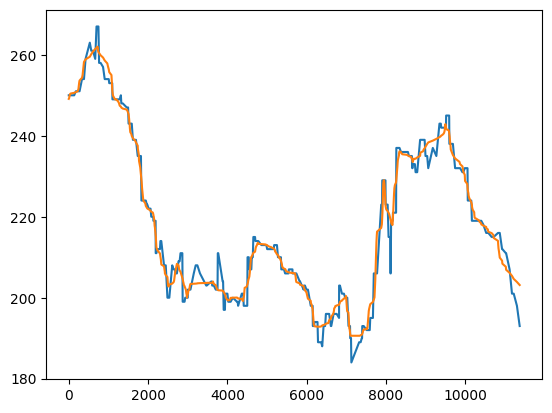

In [5]:
h_savgol=scipy.signal.savgol_filter(data_dict['Prag'][data_dict['Prag']['Linie']=='Tram 18: Vozovna Pankrác ⇒ Nádraží Podbaba']['Höhe'],25,1)
#sns.lineplot(data_dict['Graz'][data_dict['Graz']['Linie']=='Tram 1: Eggenberg/UKH => Mariatrost'], x='Distanz', y='Höhe', hue= 'Linie', legend=False)
plt.plot('Distanz', 'Höhe', data=data_dict['Prag'][data_dict['Prag']['Linie']=='Tram 18: Vozovna Pankrác ⇒ Nádraží Podbaba'])
plt.plot('Distanz', h_savgol, data=data_dict['Prag'][data_dict['Prag']['Linie']=='Tram 18: Vozovna Pankrác ⇒ Nádraží Podbaba'])

Überlagerung der Höhe und der Krümmung führt zu __nix__.

<Axes: xlabel='Distanz', ylabel='Krümmung'>

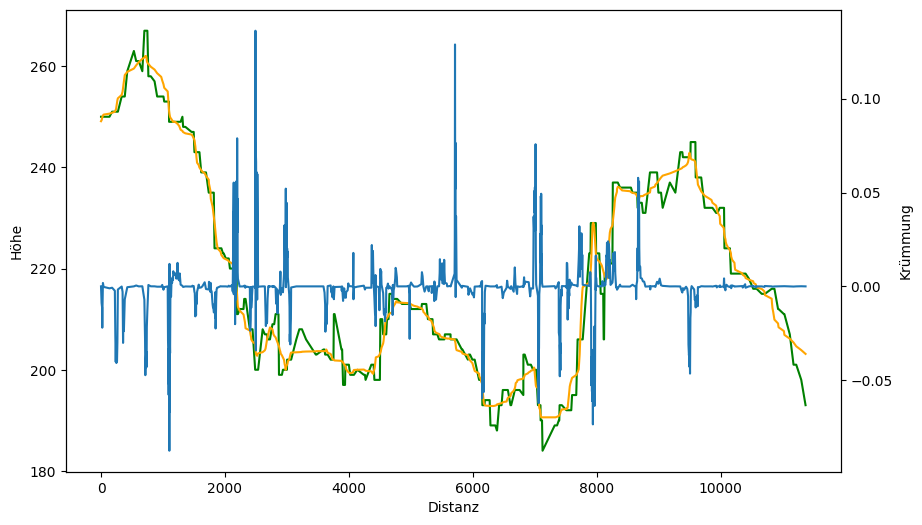

In [6]:
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.lineplot(data= data_dict['Prag'][data_dict['Prag']['Linie']=='Tram 18: Vozovna Pankrác ⇒ Nádraží Podbaba'], x='Distanz', y= 'Höhe', color='green')
plt.plot('Distanz', h_savgol, 'orange', data=data_dict['Prag'][data_dict['Prag']['Linie']=='Tram 18: Vozovna Pankrác ⇒ Nádraží Podbaba'])
ax = ax1.twinx()
sns.lineplot(data= data_dict['Prag'][data_dict['Prag']['Linie']=='Tram 18: Vozovna Pankrác ⇒ Nádraží Podbaba'], x='Distanz', y= 'Krümmung')

## Netzgrafik Zeichnen

In [7]:
data_dict['Wien']

,Linie,Nummer,Distanz,x,y,Latitude,Longitude,d_Winkel,Winkel,Krümmung,Gauge,Höhe
0,"Tram 71: Hauptwerkstätte => Kaiserebersdorf, Z...",71,0.00,0.00,0.00,48.15,16.46,0.00,0.00,0.00,1435,169
1,"Tram 71: Hauptwerkstätte => Kaiserebersdorf, Z...",71,6.30,4.76,-4.24,48.15,16.46,5.50,0.00,0.01,1435,170
2,"Tram 71: Hauptwerkstätte => Kaiserebersdorf, Z...",71,14.29,11.25,-9.07,48.15,16.46,7.56,5.50,0.02,1435,170
3,"Tram 71: Hauptwerkstätte => Kaiserebersdorf, Z...",71,20.52,16.71,-12.21,48.15,16.46,5.43,13.06,0.01,1435,170
4,"Tram 71: Hauptwerkstätte => Kaiserebersdorf, Z...",71,29.02,24.51,-15.85,48.15,16.46,4.83,18.50,0.01,1435,170
...,...,...,...,...,...,...,...,...,...,...,...,...
38898,"Tram 49: Ring, Volkstheater => Hütteldorf",49,8526.59,7609.95,1821.26,48.20,16.26,-1.84,1650.91,-0.01,1435,215
38899,"Tram 49: Ring, Volkstheater => Hütteldorf",49,8528.92,7609.18,1819.04,48.20,16.26,-9.57,1652.75,-0.06,1435,215
38900,"Tram 49: Ring, Volkstheater => Hütteldorf",49,8531.20,7608.11,1817.00,48.20,16.26,-2.50,1662.32,-0.01,1435,215
38901,"Tram 49: Ring, Volkstheater => Hütteldorf",49,8535.36,7606.01,1813.35,48.20,16.26,-3.81,1664.82,-0.01,1435,216


<Axes: xlabel='Longitude', ylabel='Latitude'>

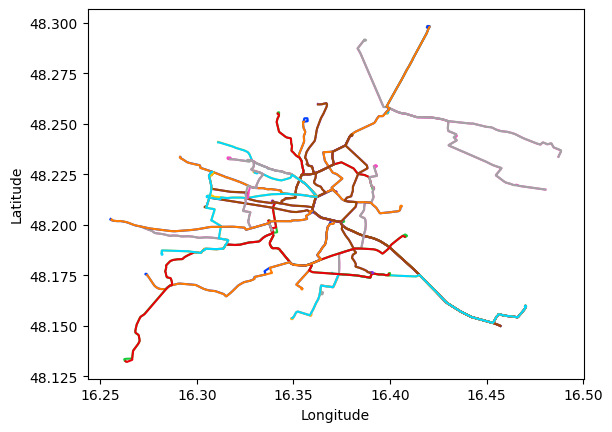

In [8]:
sns.lineplot(data= data_dict['Wien'], x='Longitude', y='Latitude', hue= 'Linie', legend=False, sort=False, palette='bright')

## Gesamtdatensatz
+ Zusammenführen der Daten
+ Errechnung der Radien
+ Reduktion auf Linien und Errechnung der Durchschnitte über die Linie

### Gesamtdatensatz

In [9]:
df_full = pd.DataFrame()
for city in data_dict:
    data_dict[city]['City']=city
    df_full = pd.concat(objs=[df_full, data_dict[city]])
df_full.reset_index(inplace=True)
df_full.drop(labels='index', axis=1, inplace=True)

df_full = df_full[~df_full.Linie.str.contains('turnaround')]

### Errchnung Radien und Fehlerbreiten

In [10]:
df_full['Krümmung upper'], df_full['Krümmung lower'] = get_error_bounds(df_full['Krümmung'])
df_full['Radius'] = 1/df_full['Krümmung']
df_full['Radius upper']=1/df_full['Krümmung upper']
df_full['Radius lower']=1/df_full['Krümmung lower']
df_full

,Linie,Nummer,Distanz,x,y,Latitude,Longitude,d_Winkel,Winkel,Krümmung,Gauge,Höhe,City,Krümmung upper,Krümmung lower,Radius,Radius upper,Radius lower
0,U15: Stammheim => Ruhbank (Fernsehturm),U15,0.00,0.00,0.00,48.85,9.16,0.00,0.00,0.00,1435.00,306.00,Stuttgart,0.00,0.00,inf,inf,inf
1,U15: Stammheim => Ruhbank (Fernsehturm),U15,10.46,0.42,10.48,48.85,9.16,-4.98,0.00,-0.01,1435.00,305.00,Stuttgart,-0.01,-0.01,-136.54,-157.59,-120.45
2,U15: Stammheim => Ruhbank (Fernsehturm),U15,21.30,1.70,21.26,48.85,9.16,-4.41,4.98,-0.01,1435.00,305.00,Stuttgart,-0.01,-0.01,-94.48,-108.13,-83.88
3,U15: Stammheim => Ruhbank (Fernsehturm),U15,23.51,2.11,23.44,48.85,9.16,1.14,9.38,0.00,1435.00,305.00,Stuttgart,0.00,0.00,671.86,793.54,582.54
4,U15: Stammheim => Ruhbank (Fernsehturm),U15,45.28,5.79,44.94,48.85,9.16,6.08,10.52,0.00,1435.00,305.00,Stuttgart,0.00,0.01,201.53,240.23,173.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672962,Muni Powell/Hyde Cable Car outbound: Powell & ...,PH,3166.88,-3065.79,1326.58,37.81,-122.42,0.18,337.36,0.00,1067.00,30.00,San Francisco,0.00,0.00,19357.49,22776.62,16830.91
672963,Muni Powell/Hyde Cable Car outbound: Powell & ...,PH,3170.27,-3069.19,1329.43,37.81,-122.42,-0.03,337.55,-0.00,1067.00,30.00,San Francisco,-0.00,-0.00,-14312.83,-16835.52,-12447.63
672964,Muni Powell/Hyde Cable Car outbound: Powell & ...,PH,3178.57,-3077.51,1336.39,37.81,-122.42,-0.26,337.58,-0.00,1067.00,30.00,San Francisco,-0.00,-0.00,-2855.80,-3356.66,-2485.00
672965,Muni Powell/Hyde Cable Car outbound: Powell & ...,PH,3188.21,-3087.13,1344.52,37.81,-122.42,0.01,337.84,0.00,1067.00,30.00,San Francisco,0.00,0.00,293557.20,345364.51,255265.43


In [11]:
pd.pivot_table(data=pd.pivot_table(data=df_full,
                           values=["Winkel", "Distanz", 'Krümmung'],
                           index=["City", "Gauge", 'Linie'],
                           aggfunc={'Winkel': ('mean', 'max'), 'Distanz': 'max', 'Krümmung': ('mean', 'max')}),
               index=["City", "Gauge"])

Distanz Krümmung        Winkel        
                              max      max  mean     max    mean
City             Gauge                                          
Amsterdam        1435.00  8847.88     0.10  0.00 1564.57  778.78
Augsburg         1000.00  7070.82     0.09  0.00 1335.77  655.69
Basel            1000.00  7354.35     0.12  0.00 1537.80  758.99
Berlin           1000.00 10914.38     0.05 -0.00 1426.72  735.24
                 1435.00 11229.27     0.10  0.00 1433.74  712.38
Bern             1000.00  7169.51     0.16  0.00 1676.09  792.20
Bordeaux         1435.00 12924.75     0.09  0.00 1539.65  764.25
Bremen           1435.00 12540.08     0.11  0.00 1905.76  963.92
Brno             1435.00 10317.80     0.10  0.00 1716.37  854.57
Brüssel          1435.00  8663.69     0.11  0.00 1499.50  742.50
Budapest         1435.00  9751.24     0.05  0.00  952.44  469.25
Chemnitz         1435.00  6533.36     0.08 -0.00  976.99  479.68
Dresden          1450.00 16635.83     0.08  0.00 2338.90 1164.65
Essen            1000.00  9760.62     0.07  0.00 1631.65  799.45
Gmunden          1000.00  2828.36     0.16  0.00  967.91  486.11
Graz             1435.00  7774.80     0.12  0.00 2033.06 1031.51
Göteborg         1435.00 17069.41     0.14  0.00 2694.11 1324.45
Halle (Saale)    1000.00  9016.60     0.10  0.00 1442.06  711.95
Helsinki         1000.00  9869.53     0.10  0.00 2216.22 1104.45
Innsbruck        1000.00  6223.14     0.17 -0.00 1870.56  929.49
Krefeld          1000.00 10677.31     0.09  0.00 1334.61  662.66
Köln             1435.00  4077.00     0.05  0.00  410.07  203.87
Leipzig          1458.00 12516.68     0.07  0.00 1538.64  769.33
Linz             900.00  13335.70     0.08  0.00 2258.84 1104.67
Luxembourg       1435.00 20172.06     0.08 -0.00 2095.24 1029.73
Lyon             1435.00  6292.76     0.09  0.00  722.77  360.97
Mailand          1445.00  9257.18     0.20  0.00 1673.04  818.17
Manchester       1435.00    29.47     0.00 -0.00    0.41    0.14
München          1435.00  8583.99     0.10  0.00 1504.13  747.72
Nürnberg         1435.00  7353.53     0.09  0.00 1308.76  644.35
Portland         1435.00 19084.78     0.07  0.00 2069.04 1024.47
Potsdam          1435.00  8066.61     0.08  0.00 1218.32  582.48
Prag             1435.00 16330.69     0.12  0.00 2583.45 1283.74
San Francisco    1067.00  2679.95     0.10  0.00  273.82  133.72
                 1435.00 11644.13     0.07  0.00  874.89  418.67
Sankt Petersburg 1524.00 10808.48     0.10  0.00 1044.40  520.22
Stuttgart        1000.00  4642.76     0.06  0.00  586.44  304.87
                 1435.00 15301.82     0.05  0.00 1936.78  968.82
Toronto          1495.00 10046.48     0.13  0.00 1115.37  554.35
Ulm              1000.00 10081.60     0.10  0.00 2314.18 1124.37
Wien             1435.00  7585.30     0.12  0.00 1400.54  706.93
Zwickau          1000.00  6513.96     0.09  0.00 1293.54  642.26
Zürich           1000.00  8040.47     0.10  0.00 1883.69  938.72

<Axes: xlabel='City', ylabel='Winkel'>

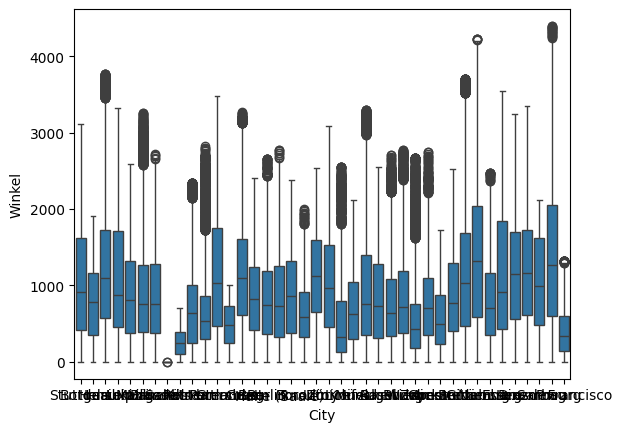

In [12]:
sns.boxplot(data=df_full, y='Winkel', x='City', orient='v')

<ErrorbarContainer object of 3 artists>

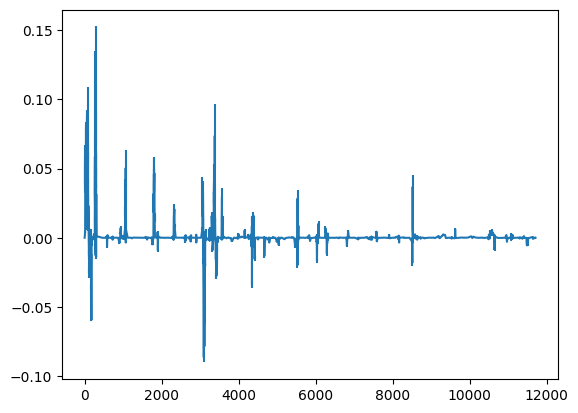

In [13]:
#curvature_array=df_full[df_full['Linie']=='Tram 71: Schottenring => Hauptwerkstätte']['Radius']
#sns.lineplot(data = df_full[df_full['Linie']=='Tram 71: Schottenring => Hauptwerkstätte'], x='Distanz', y= 'Radius', errorbar=poly_quadratic(curvature_array, 2.24, 0.15))
error = abs(poly_quadratic(df_full[df_full['Linie']=='Tram 71: Schottenring => Hauptwerkstätte']['Krümmung'], 2.24, 0.15))
plt.errorbar('Distanz', 'Krümmung', data=df_full[df_full['Linie']=='Tram 71: Schottenring => Hauptwerkstätte'], yerr=error)

## Überprüfung der Daten in Portland
Hier sieht die Länge einer Linie komisch aus.

In [14]:
df_full[df_full['Distanz']==max(df_full['Distanz'])]

,Linie,Nummer,Distanz,x,y,Latitude,Longitude,d_Winkel,Winkel,Krümmung,Gauge,Höhe,City,Krümmung upper,Krümmung lower,Radius,Radius upper,Radius lower
168173,MAX Red Line: Hillsboro Airport/Fairgrounds =>...,Red,35902.72,8720.46,24528.58,45.59,-122.59,0.00,3479.90,0.00,1435.00,9.00,Portland,0.00,0.00,inf,inf,inf


In [15]:
df_full[df_full['Linie']=='MAX Red Line: Hillsboro Airport/Fairgrounds => Portland International Airport']

,Linie,Nummer,Distanz,x,y,Latitude,Longitude,d_Winkel,Winkel,Krümmung,Gauge,Höhe,City,Krümmung upper,Krümmung lower,Radius,Radius upper,Radius lower
166517,MAX Red Line: Hillsboro Airport/Fairgrounds =>...,Red,0.00,0.00,0.00,45.50,-122.84,0.00,0.00,0.00,1435.00,57.00,Portland,0.00,0.00,inf,inf,inf
166518,MAX Red Line: Hillsboro Airport/Fairgrounds =>...,Red,25.11,30.33,3.22,45.50,-122.84,-1.43,0.00,-0.00,1435.00,58.00,Portland,-0.00,-0.00,-1453.07,-1706.40,-1265.24
166519,MAX Red Line: Hillsboro Airport/Fairgrounds =>...,Red,53.78,65.03,6.12,45.50,-122.84,0.12,1.43,0.00,1435.00,64.00,Portland,0.00,0.00,27750.35,32650.57,24129.05
166520,MAX Red Line: Hillsboro Airport/Fairgrounds =>...,Red,108.03,130.70,11.73,45.50,-122.84,0.47,1.55,0.00,1435.00,64.00,Portland,0.00,0.00,6668.65,7848.57,5797.13
166521,MAX Red Line: Hillsboro Airport/Fairgrounds =>...,Red,135.41,163.81,14.81,45.50,-122.84,1.33,2.02,0.00,1435.00,62.00,Portland,0.00,0.00,1579.65,1861.52,1371.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168169,MAX Red Line: Hillsboro Airport/Fairgrounds =>...,Red,35818.71,8820.90,24510.10,45.59,-122.59,4.21,3474.44,0.01,1435.00,8.00,Portland,0.00,0.01,189.26,225.81,162.90
168170,MAX Red Line: Hillsboro Airport/Fairgrounds =>...,Red,35826.72,8811.33,24511.92,45.59,-122.59,0.15,3478.65,0.00,1435.00,7.00,Portland,0.00,0.00,6310.07,7426.72,5485.33
168171,MAX Red Line: Hillsboro Airport/Fairgrounds =>...,Red,35843.87,8790.84,24515.76,45.59,-122.59,-0.31,3478.80,-0.00,1435.00,7.00,Portland,-0.00,-0.00,-3486.06,-4098.15,-3033.05
168172,MAX Red Line: Hillsboro Airport/Fairgrounds =>...,Red,35854.88,8777.71,24518.29,45.59,-122.59,0.79,3479.11,0.00,1435.00,7.00,Portland,0.00,0.00,2880.67,3392.13,2503.24


<Axes: xlabel='Longitude', ylabel='Latitude'>

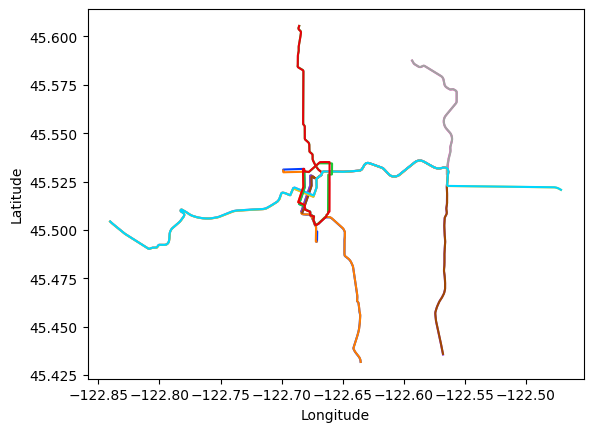

In [16]:
sns.lineplot(data= data_dict['Portland'], x='Longitude', y='Latitude', hue= 'Linie', legend=False, sort=False, palette='bright')